In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Create a Simple Animal Dataset
data = { 'height': [30, 45,35, 50, 20, 25, 40, 55],
        'weight': [5, 20, 15, 25, 3, 7, 18, 30],
        'fur_length': [1, 2, 1, 3, 1, 1, 2, 3], # 1: Short, 2: Medium, 3:Long
        'ear_shape': [0, 1, 1, 0, 0, 0, 1, 1], # 0: Pointed, 1: Floppy
         'animal_type': [0, 1, 1, 2, 0, 0, 2, 2] # 0: Rabbit, 1: Dog, 2: Bear
}

df = pd.DataFrame(data)



   height  weight  fur_length  ear_shape  animal_type
0      30       5           1          0            0
1      45      20           2          1            1
2      35      15           1          1            1
3      50      25           3          0            2
4      20       3           1          0            0
5      25       7           1          0            0
6      40      18           2          1            2
7      55      30           3          1            2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   height       8 non-null      int64
 1   weight       8 non-null      int64
 2   fur_length   8 non-null      int64
 3   ear_shape    8 non-null      int64
 4   animal_type  8 non-null      int64
dtypes: int64(5)
memory usage: 452.0 bytes
None


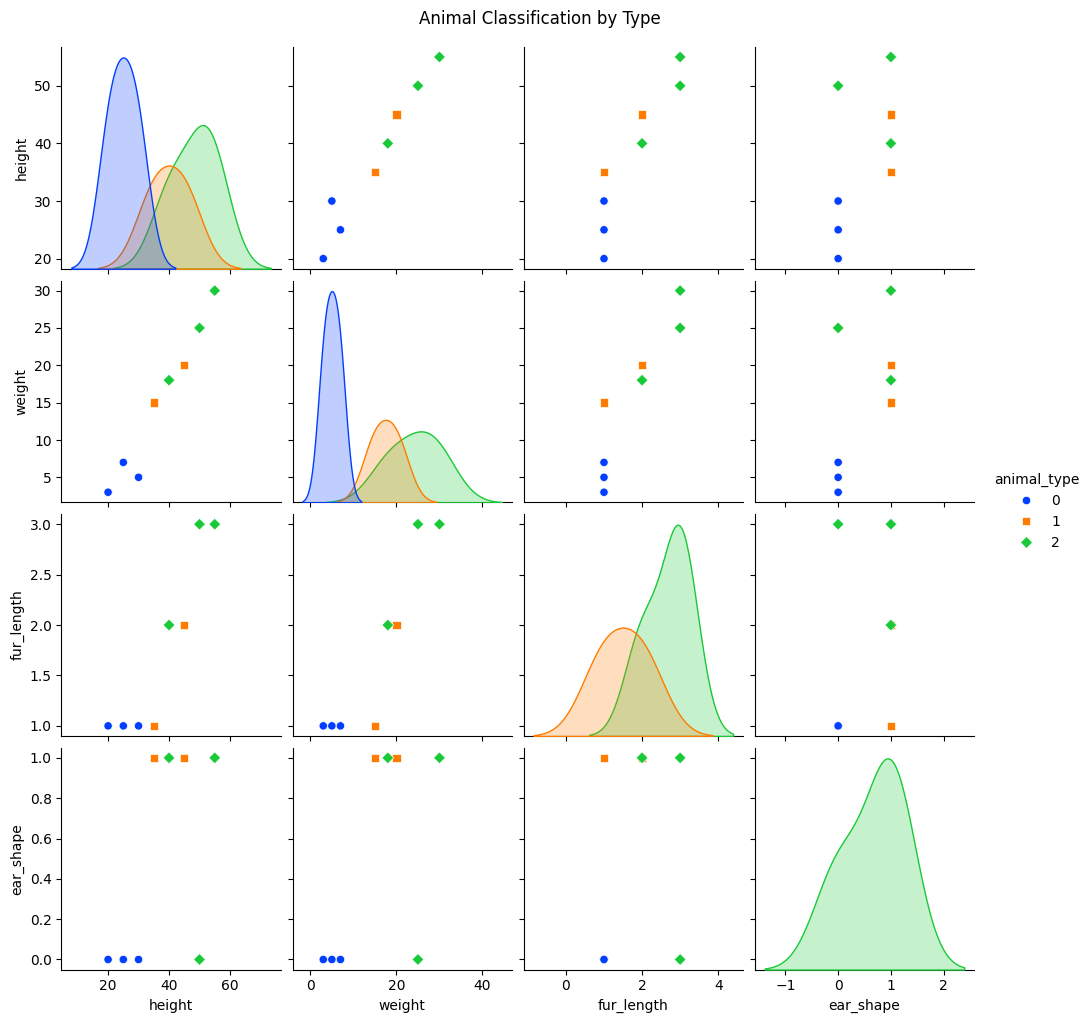

In [3]:
sns.pairplot(df, hue='animal_type', markers=['o', 's', 'D'], palette='bright', diag_kind='kde')
plt.suptitle('Animal Classification by Type', y=1.02)
plt.show()

In [7]:
X = df.drop('animal_type', axis=1)
y = df['animal_type']

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


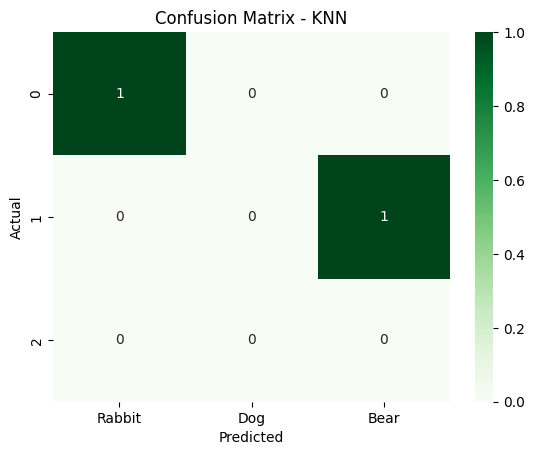

In [18]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', xticklabels=['Rabbit', 'Dog', 'Bear'], yticklabels=['Rabbit', 'Dog', 'Bear'])
plt.title("Confusion Matrix - KNN")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
print("KNeighbors Results")
print(f"Accuracy{accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn, target_names=['Rabbit', 'Dog', 'Bear']))


KNeighbors Results
Accuracy0.5
              precision    recall  f1-score   support

      Rabbit       1.00      1.00      1.00         1
         Dog       0.00      0.00      0.00         1
        Bear       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [20]:
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)


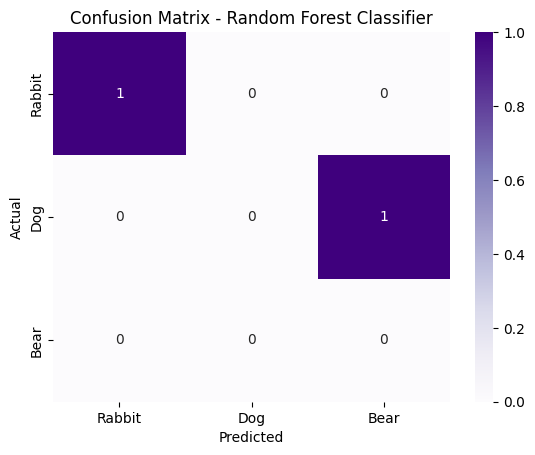

In [21]:
cm_forest = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(cm_forest, annot=True, fmt='d', cmap='Purples', xticklabels=['Rabbit', 'Dog', 'Bear'], yticklabels=['Rabbit', 'Dog', 'Bear'])
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [22]:
print("Random Forest Results")
print(f"Accuracy{accuracy_score(y_test, y_pred_forest)}")
print(classification_report(y_test, y_pred_forest, target_names=['Rabbit', 'Dog', 'Bear']))

Random Forest Results
Accuracy0.5
              precision    recall  f1-score   support

      Rabbit       1.00      1.00      1.00         1
         Dog       0.00      0.00      0.00         1
        Bear       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_